In [1]:
#https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [4]:
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv('data/taxidata.csv')

In [6]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836848,2,2016-05-27 12:24:58,2016-05-27 12:39:38,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
11836849,2,2016-05-27 12:44:54,2016-05-27 12:48:17,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
11836850,2,2016-05-27 12:48:51,2016-05-27 13:40:56,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,28.5,0.5,0.5,0.00,0.0,0.3,29.80
11836851,2,2016-05-27 14:18:21,2016-05-27 14:38:13,1,0.00,0.000000,0.000000,1,N,0.000000,0.000000,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [7]:
df = df[df["pickup_longitude"] < 0] 
df = df[df["dropoff_longitude"] < 0] 
df = df[df["pickup_latitude"] > 0] 
df = df[df["dropoff_latitude"] > 0]  #removing some rows that dont have any data

In [8]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


In [9]:
df = df[df["tip_amount"] == 0] #we ant to look at trips with no tips
df = df[df["RatecodeID"] == 1] #we want standard rides 
df = df[df["payment_type"] == 1] #tips arent reported on cash rides so we need to look at only credit card trips
df = df.sample(n=10000, random_state=1) #lets just look at a random sample of 10000 so it will actually load 

In [10]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8701470,1,2016-05-25 17:52:33,2016-05-25 17:56:24,1,0.40,-73.957870,40.779465,1,N,-73.952271,40.781170,1,4.5,1.0,0.5,0.0,0.0,0.3,6.3
2978078,1,2016-05-08 13:24:32,2016-05-08 13:49:40,1,5.80,-73.813095,40.704845,1,N,-73.871582,40.752895,1,22.0,0.0,0.5,0.0,0.0,0.3,22.8
4134546,1,2016-05-11 17:40:54,2016-05-11 17:48:33,1,1.00,-73.968498,40.764923,1,N,-73.955650,40.768429,1,7.0,1.0,0.5,0.0,0.0,0.3,8.8
3209146,2,2016-05-09 07:05:19,2016-05-09 07:15:13,1,1.77,-73.957390,40.777050,1,N,-73.973900,40.754391,1,8.5,0.0,0.5,0.0,0.0,0.3,9.3
1971941,2,2016-05-06 03:07:06,2016-05-06 03:32:16,1,6.07,-74.005600,40.740822,1,N,-73.944328,40.692917,1,22.5,0.5,0.5,0.0,0.0,0.3,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398849,1,2016-05-14 19:10:18,2016-05-14 19:29:09,2,1.20,-73.999123,40.726402,1,N,-73.982903,40.728088,1,12.0,0.5,0.5,0.0,0.0,0.3,13.3
8586757,2,2016-05-24 20:09:19,2016-05-24 20:15:32,1,0.86,-73.989677,40.757259,1,N,-73.991364,40.751492,1,5.5,0.5,0.5,0.0,0.0,0.3,6.8
96204,2,2016-05-01 00:38:18,2016-05-01 00:46:31,1,0.94,-73.982246,40.764950,1,N,-73.967896,40.758389,1,7.0,0.5,0.5,0.0,0.0,0.3,8.3
7471194,1,2016-05-19 20:02:37,2016-05-19 20:19:52,3,2.00,-73.972794,40.757915,1,N,-73.955215,40.777733,1,12.5,1.0,0.5,0.0,0.0,0.3,14.3


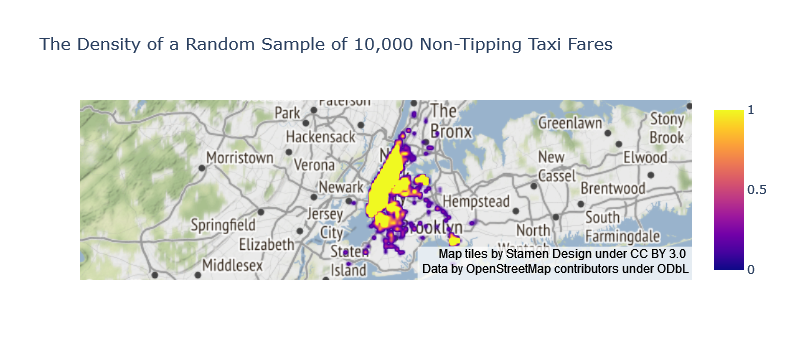

In [14]:
fig = px.density_mapbox(df, lat='pickup_latitude', lon='pickup_longitude',radius=3,
                        title = 'The Density of a Random Sample of 10,000 Non-Tipping Taxi Fares',
                        mapbox_style="stamen-terrain")
fig.show()